## Parse the Sample table

In [1]:
smp = open("../../tempest2k/src/incbin/sound_samples_table.bin",'rb')
smp.seek(0)
for i in range(0,31):
    print("dc.b",
          f"'{smp.read(20).decode('utf-8')}',", # Name
          f"${smp.read(2).hex()},", # Index
          f"${smp.read(2).hex()},", # Index
          f"${smp.read(4).hex()},", # Index
          f"${smp.read(3).hex()},", # Index
          f"${smp.read(1).hex()},", # Index
          f"${smp.read(4).hex()},", # Index
          f"${smp.read(3).hex()}", # Index
          f"${smp.read(1).hex()}", # Index
         )



dc.b 'Engine Noise 1      ', $0001, $01ac, $009acd00, $0011a0, $00, $009acd02, $00119e $00
dc.b 'Player Shot Normal 2', $0002, $01ac, $009adea4, $0008e8, $00, $009adea4, $000000 $00
dc.b 'Engine Noise        ', $0003, $01ac, $009ae290, $003378, $00, $009aee9e, $002594 $00
dc.b 'Player Death        ', $0004, $00d6, $00000000, $00549a, $00, $00000000, $000000 $00
dc.b 'Player Death 2      ', $0005, $01ac, $00000000, $002458, $00, $00000000, $000000 $00
dc.b 'Player Shot Normal  ', $0006, $01ac, $009b160c, $0007a4, $00, $009b160c, $000000 $00
dc.b 'Player Jump         ', $0007, $01ac, $009b1db4, $0018de, $00, $009b1db4, $000000 $00
dc.b 'Crackle             ', $0008, $00d6, $009b3696, $004594, $00, $009b3696, $000000 $00
dc.b 'Cleared Level       ', $0009, $01ac, $009b7c2e, $0037a2, $00, $009b7c2e, $000000 $00
dc.b 'Warp                ', $000a, $0238, $009bb3d4, $006ec8, $00, $009bb3d4, $000000 $00
dc.b 'Large Explosion     ', $000b, $01ac, $009c22a0, $0050c2, $00, $009c22a0, $000000 $00

In [3]:
!play -t raw -r 8k -e signed-integer -b 8 -c 2 \
    ../../tempest2k/src/incbin/paddingbetweentunesandsmp.bin

play WARN alsa: can't encode 0-bit Unknown or not applicable
play WARN alsa: can't encode 8-bit Signed Integer PCM

../../tempest2k/src/incbin/paddingbetweentunesandsmp.bin:

 File Size: 37.3k     Bit Rate: 128k
  Encoding: Signed PCM    
  Channels: 2 @ 8-bit    
Samplerate: 8000Hz       
Replaygain: off         
  Duration: 00:00:02.33  

In:100%  00:00:02.33 [00:00:00.00] Out:18.7k [      |      ] Hd:0.0 Clip:0    
Done.


## Play the raw sample files

Example, play 'Excellent' sample.

In [4]:
# !ffplay -f s8 -ar 10k -ac 2 ../tempest2k/src/sounds/samples/22
!play -t raw -r 10k -e signed-integer -b 8 -c 2 samples/22

play WARN alsa: can't encode 0-bit Unknown or not applicable
play WARN alsa: can't encode 8-bit Signed Integer PCM

samples/22:

 File Size: 22.9k     Bit Rate: 160k
  Encoding: Signed PCM    
  Channels: 2 @ 8-bit    
Samplerate: 10000Hz      
Replaygain: off         
  Duration: 00:00:01.15  

In:100%  00:00:01.15 [00:00:00.00] Out:11.5k [!=====|=====!]        Clip:0    
Done.


## Create wav versions of samples

In [4]:
wav_info = []
smp = open("../../tempest2k/src/incbin/sound_samples_table.bin",'rb')
smp.seek(0)
for i in range(0,31):
    wav_info += [[
          f"'{smp.read(20).decode('utf-8').strip()}',", # Name
          f"${smp.read(2).hex()},", # Index
          f"${smp.read(2).hex()},", # Index
          f"${smp.read(4).hex()},", # Index
          f"${smp.read(3).hex()},", # Index
          f"${smp.read(1).hex()},", # Index
          f"${smp.read(4).hex()},", # Index
          f"${smp.read(3).hex()}", # Index
          f"${smp.read(1).hex()}", # Index
    ]]
wav_info.sort(key=lambda x: x[3])
wav_info[21]


["'Excellent',",
 '$0016,',
 '$0200,',
 '$009d8052,',
 '$005976,',
 '$00,',
 '$009d8052,',
 '$000000',
 '$00']

In [6]:
import numpy as np
from scipy.io.wavfile import write
from scipy import signal as sg
def signed(x): return (((x >> 7) * 128) ^ x) - ((x >> 7) * 128)
import wave
import os

SMP_DIR = "samples/"
wav_files = []
for fn in os.listdir(SMP_DIR):
    if "wav" in fn:
        continue
    wav_files += [SMP_DIR+fn+".wav"]
    
    bs = open(SMP_DIR+fn,'rb').read()
    data = [signed(bs[i]) for i in range(0,len(bs))]
    scaled = np.int16(data/np.max(np.abs(data)) * 32767) 
    with wave.open(SMP_DIR+fn+".wav", "wb") as out_f:
        out_f.setnchannels(2)
        out_f.setsampwidth(2) # number of bytes
        out_f.setframerate(10000)
        out_f.writeframes(scaled)



/tmp/ipykernel_4135833/1235137852.py:17: RuntimeWarning: invalid value encountered in divide
  scaled = np.int16(data/np.max(np.abs(data)) * 32767)
/tmp/ipykernel_4135833/1235137852.py:17: RuntimeWarning: invalid value encountered in cast
  scaled = np.int16(data/np.max(np.abs(data)) * 32767)


## Create Spectrograms

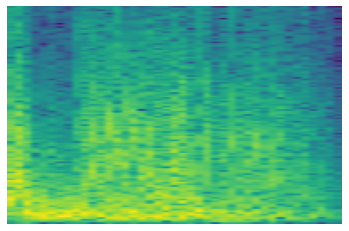

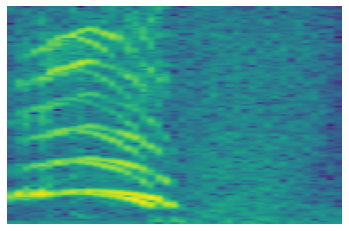

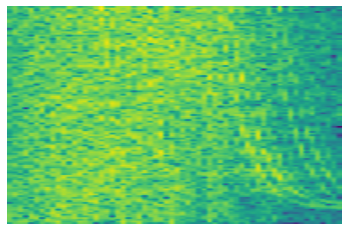

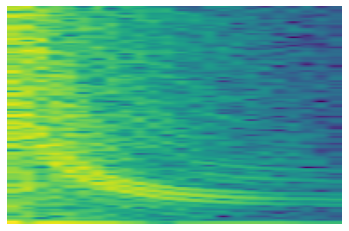

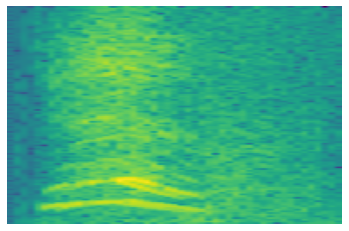

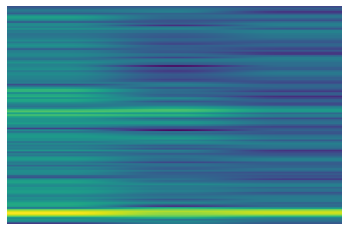

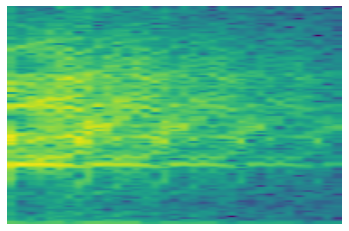

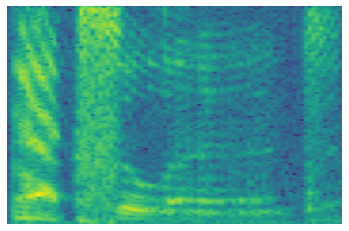

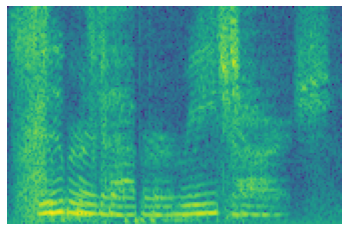

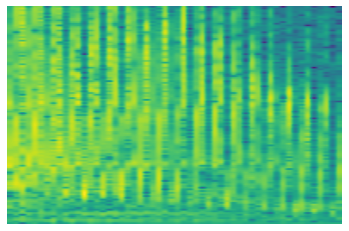

/tmp/ipykernel_4135833/2044293144.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=4).
  powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud[:,0], Fs=Fs)


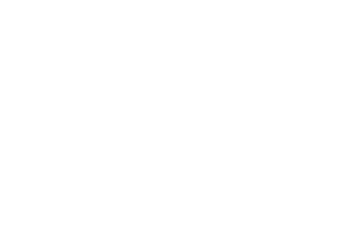

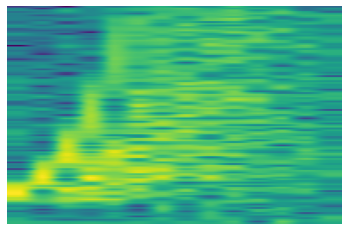

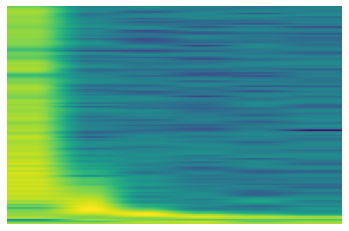

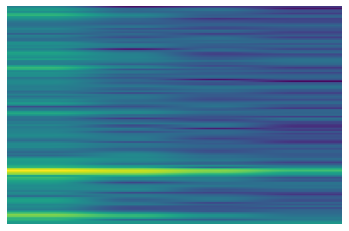

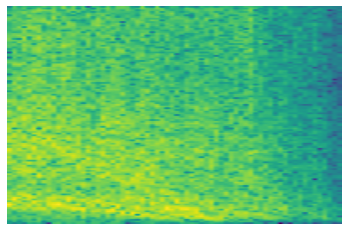

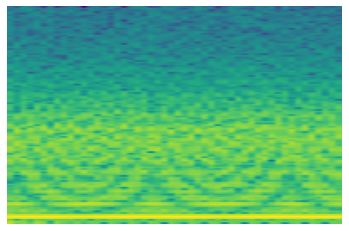

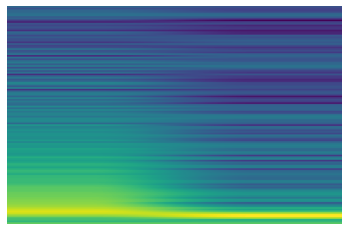

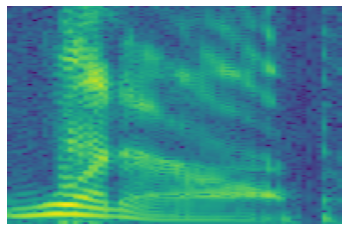

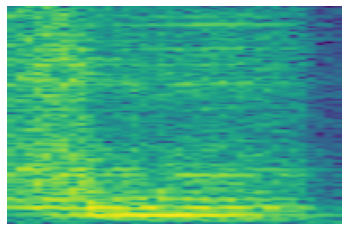

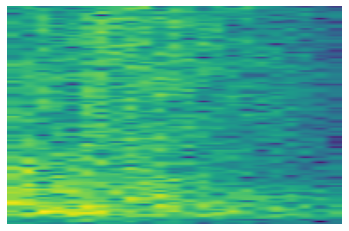

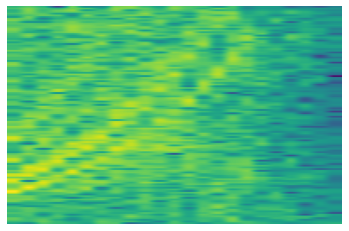

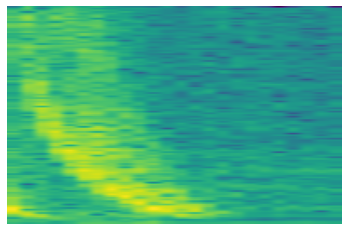

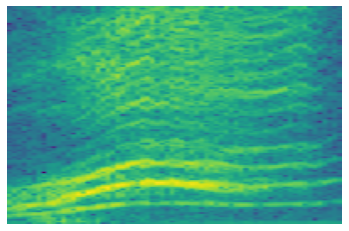

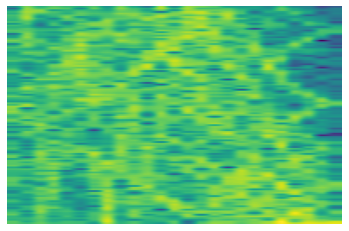

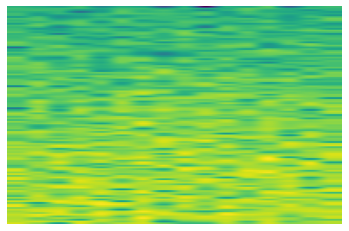

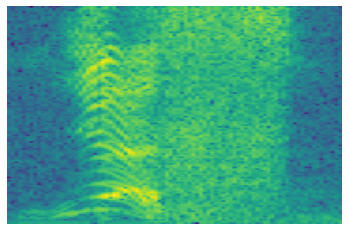

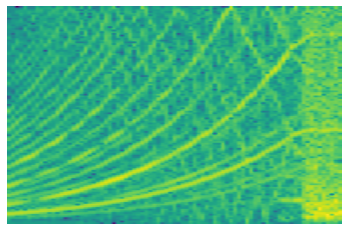

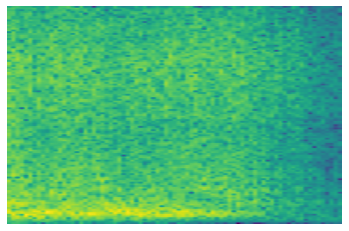

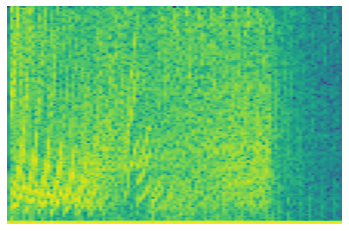

/tmp/ipykernel_4135833/2044293144.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=15).
  powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud[:,0], Fs=Fs)


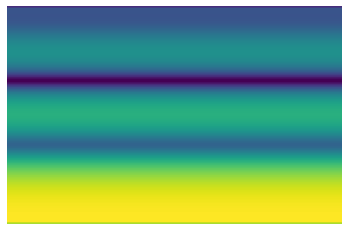

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

for wav_file in wav_files:
    Fs, aud = wavfile.read(wav_file)
    fig, axs = plt.subplots() 
    axs.set_axis_off() 
    powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud[:,0], Fs=Fs)
    plt.savefig(f"{wav_file}-button.png", bbox_inches="tight")
    plt.show()
    

### Entries for a table of the sound samples

In [23]:
for i,w in enumerate(wav_info):
    nm = w[0]
    num = f'{i+1:02}'
    print(f"""    \\begin{{subfigure}}{{0.23\\textwidth}}
      \\includegraphics[width=3cm]{{sounds/buttons/{num}.wav-button.png}}%
      \\makebox[0pt][r]{{%
        \\raisebox{{.3cm}}{{%
          \\textattachfile{{src/sounds/wav/{num}.wav}}{{\\includegraphics[width=1.5cm]{{sounds/play.png}}}}%
        }}\hspace*{{0.75cm}}%
      }}%
      \\caption*{{{nm[:-1]}}}
    \\end{{subfigure}}""")

    \begin{subfigure}{0.23\textwidth}
      \includegraphics[width=3cm]{sounds/buttons/01.wav-button.png}%
      \makebox[0pt][r]{%
        \raisebox{.3cm}{%
          \textattachfile{src/sounds/wav/01.wav}{\includegraphics[width=1.5cm]{sounds/play.png}}%
        }\hspace*{0.75cm}%
      }%
      \caption*{'Player Death'}
    \end{subfigure}
    \begin{subfigure}{0.23\textwidth}
      \includegraphics[width=3cm]{sounds/buttons/02.wav-button.png}%
      \makebox[0pt][r]{%
        \raisebox{.3cm}{%
          \textattachfile{src/sounds/wav/02.wav}{\includegraphics[width=1.5cm]{sounds/play.png}}%
        }\hspace*{0.75cm}%
      }%
      \caption*{'Player Death 2'}
    \end{subfigure}
    \begin{subfigure}{0.23\textwidth}
      \includegraphics[width=3cm]{sounds/buttons/03.wav-button.png}%
      \makebox[0pt][r]{%
        \raisebox{.3cm}{%
          \textattachfile{src/sounds/wav/03.wav}{\includegraphics[width=1.5cm]{sounds/play.png}}%
        }\hspace*{0.75cm}%
      }%
      \caption*{'E

## Scratchpad